<a href="https://colab.research.google.com/github/vinayex2/courses/blob/master/DIAT_CNN_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'Train Shape {x_train.shape} and Y Shape is {y_train.shape}')

Train Shape (60000, 28, 28) and Y Shape is (60000,)


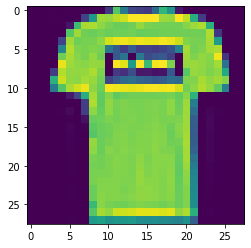

In [6]:
plt.imshow(x_train[1,:,:])

In [7]:
fashion_mnist_labels = [
                        't-shirt/top',
                        'trouser',
                        'pullover',
                        'dress',
                        'coat',
                        'sandal',
                        'shirt',
                        'sneaker',
                        'bag',
                        'ankle boot'                        
]

Y is 2 and label is pullover


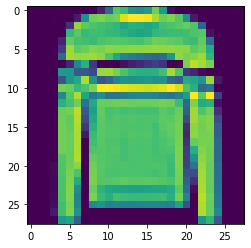

In [10]:
img_index = 5
label_index = y_train[img_index]
print(f'Y is {label_index} and label is {fashion_mnist_labels[label_index]}')
plt.imshow(x_train[img_index,:,:])

Further break training into Train and Validation

In [11]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [12]:
#Reshape input from (28,28) to (28,28,1)
w,h = 28,28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_valid = x_valid.reshape(x_valid.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1)

In [13]:
#One Hot Encoding for labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [14]:
print(f'X_train shape {x_train.shape} and y shape {y_train.shape}')

X_train shape (55000, 28, 28, 1) and y shape (55000, 10)


In [15]:
print(f'Length of Train, Valid and Test is {x_train.shape[0]}, {x_valid.shape[0]} and {x_test.shape[0]}')

Length of Train, Valid and Test is 55000, 5000 and 10000


Building **LeNet** Model

In [22]:
def build_lenet_model():
  model = tf.keras.Sequential()
  #Must define input shape in first layer of NN
  model.add(tf.keras.layers.Conv2D(filters=6,
                                   kernel_size=5,
                                   activation='sigmoid',
                                   padding= 'same',
                                   input_shape = (28,28,1)))
  #Avg Pooling with strides
  model.add(tf.keras.layers.AvgPool2D(pool_size=2,
                                      strides=2))
  
  model.add(tf.keras.layers.Conv2D(filters=16,
                                   kernel_size=5,
                                   activation='sigmoid'))
  
  model.add(tf.keras.layers.AvgPool2D(pool_size=2,
                                      strides=2))
  
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(120, activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(84, activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model
  
  

In [23]:
le_net = build_lenet_model()
print(le_net.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

Model Checkpointing

In [24]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='model.weights.best.hdf5',
                             verbose=1,
                             save_best_only=True)
model_log = le_net.fit(x_train,
                      y_train,
                      batch_size=64,
                      epochs=10,
                      validation_data = (x_valid,y_valid),
                      callbacks = [checkpoint])

Epoch 1/10
860/860 [==============================] - 35s 40ms/step - loss: 1.3986 - accuracy: 0.4982 - val_loss: 0.5790 - val_accuracy: 0.7810

Epoch 00001: val_loss improved from inf to 0.57904, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 35s 40ms/step - loss: 0.5684 - accuracy: 0.7773 - val_loss: 0.4560 - val_accuracy: 0.8272

Epoch 00002: val_loss improved from 0.57904 to 0.45602, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 35s 40ms/step - loss: 0.4740 - accuracy: 0.8218 - val_loss: 0.4035 - val_accuracy: 0.8530

Epoch 00003: val_loss improved from 0.45602 to 0.40347, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 35s 41ms/step - loss: 0.4185 - accuracy: 0.8447 - val_loss: 0.3794 - val_accuracy: 0.8570

Epoch 00004: val_loss improved from 0.40347 to 0.37939, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

In [25]:
score  = le_net.evaluate(x_test,y_test)
print(f'Test Accuracy is {score[1]}')

313/313 [==============================] - 4s 12ms/step - loss: 0.3312 - accuracy: 0.8786
Test Accuracy is 0.878600001335144


Improving on **Le Net**

In [26]:
def build_lenet_model_variant():
  model = tf.keras.Sequential()
  #Must define input shape in first layer of NN
  model.add(tf.keras.layers.Conv2D(filters=64,
                                   kernel_size=2,
                                   activation='relu',
                                   padding= 'same',
                                   input_shape = (28,28,1)))
  #Avg Pooling with strides
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))
  
  model.add(tf.keras.layers.Conv2D(filters=32,
                                   kernel_size=2,
                                   padding= 'same',
                                   activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))  
  
  model.add(tf.keras.layers.Flatten())
  
  '''We need bigger fully connected layer as Output shape from flattened
  Convolutions  is 1568'''

  model.add(tf.keras.layers.Dense(256, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.5))   
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [27]:
le_net_variant = build_lenet_model_variant()
print(le_net_variant.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)             

In [28]:
checkpoint = ModelCheckpoint(filepath='model_v2.weights.best.hdf5',
                             verbose=1,
                             save_best_only=True)
model_log = le_net_variant.fit(x_train,
                      y_train,
                      batch_size=64,
                      epochs=10,
                      validation_data = (x_valid,y_valid),
                      callbacks = [checkpoint])

Epoch 1/10
860/860 [==============================] - 62s 72ms/step - loss: 4.7957 - accuracy: 0.5649 - val_loss: 0.4960 - val_accuracy: 0.8186

Epoch 00001: val_loss improved from inf to 0.49598, saving model to model_v2.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 61s 71ms/step - loss: 0.6296 - accuracy: 0.7643 - val_loss: 0.4280 - val_accuracy: 0.8450

Epoch 00002: val_loss improved from 0.49598 to 0.42803, saving model to model_v2.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 62s 72ms/step - loss: 0.5393 - accuracy: 0.7963 - val_loss: 0.3718 - val_accuracy: 0.8648

Epoch 00003: val_loss improved from 0.42803 to 0.37185, saving model to model_v2.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 61s 71ms/step - loss: 0.4887 - accuracy: 0.8210 - val_loss: 0.3407 - val_accuracy: 0.8760

Epoch 00004: val_loss improved from 0.37185 to 0.34065, saving model to model_v2.weights.best.hdf5
Epoch 5/10
860/860 [========

In [29]:
score  = le_net_variant.evaluate(x_test,y_test)
print(f'Test Accuracy is {score[1]}')

313/313 [==============================] - 3s 9ms/step - loss: 0.3111 - accuracy: 0.8867
Test Accuracy is 0.8866999745368958


Moving to **AlexNet**
```
Very Deep Convolutional NN
Achieved with GPUs as data and computation is huge
```

* 8 Layer CNN for *ImageNet* Dataset(larger 224*224)
* Relu as activation (**lenet** used sigmoid)
* First Layer filters are 11*11
* Added Image Augmentation(flipping, clipping and color change)
* uses dropout (**lenet** used weight decay)

In [34]:
def build_alex_net():
  model = tf.keras.Sequential()
  #Must define input shape in first layer of NN
  model.add(tf.keras.layers.Conv2D(filters=32,
                                   kernel_size=11,
                                   activation='relu',
                                   padding= 'same',
                                   input_shape = (28,28,1)))
  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=64,
                                   kernel_size=5,
                                   activation='relu',
                                   padding= 'same'))
  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))
  
  model.add(tf.keras.layers.Conv2D(filters=128,
                                   kernel_size=3,
                                   padding= 'same',
                                   activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=128,
                                   kernel_size=3,
                                   padding= 'same',
                                   activation='relu'))
  #model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  #model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=128,
                                   kernel_size=3,
                                   padding= 'same',
                                   activation='relu'))
  #model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  #model.add(tf.keras.layers.Dropout(0.3))  
  
  model.add(tf.keras.layers.Flatten())
  
  '''We need bigger fully connected layer as Output shape from flattened
  Convolutions  is 1568'''

  model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.5))   
  model.add(tf.keras.layers.Dense(1000, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [35]:
alexnet = build_alex_net()
print(alexnet.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        3904      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)        

Relu Activation
```
output = max(0,input)
```
Why?
1. Deep Layers cause vanishing gradient problem (solved with Relu)
2. Gradient tends to be close to zero for deeper networks (as sigmoid and tanh are flat at the beginning and end) 
3. Hence, learning is slow
4. Sigmoid and Tanh are exponential in nature whereas RELU is piecewise linear and less costly (easier to train)

*Transfer Learning*

1. Useful when you donot have sufficient 
labelled data for task

2. One-Shot and Zero-shot learning

3. Key driver for success of ML in Industry


From AlexNet to **VGG**

1. Consists of VGG Block

> One Block contains sequence of Convolution Layer and maxpooling layer

2. Has 5 Convolutional blocks

> First Two have two Conv layers

> later Three have three Conv Layers

> 3 Fully connected layer

3. All Conv have 3 * 3 filters with 2 * 2 italicized text MaxPool

4. Number of Channels remains the same




Synthetic Mnist with **VGG-16**

In [36]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinayex2","key":"f2a28eb042824629fed6dd52bc279b6d"}'}

In [37]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [38]:
!kaggle datasets download -d 'prasunroy/synthetic-digits'

 95% 221M/232M [00:01<00:00, 199MB/s]
100% 232M/232M [00:01<00:00, 198MB/s]


In [ ]:
!unzip synthetic-digits.zip -d synthetic-digits

Data Generators for **Real ML**

In [5]:
imagegen = tf.keras.preprocessing.image.ImageDataGenerator()
batch_size=128
dimen = 224
train = imagegen.flow_from_directory('/content/synthetic-digits/synthetic_digits/imgs_train',
                                    class_mode='categorical',
                                    shuffle=False,
                                    batch_size=batch_size,
                                    target_size=(dimen,dimen))
val = imagegen.flow_from_directory('/content/synthetic-digits/synthetic_digits/imgs_valid',
                                    class_mode='categorical',
                                    shuffle=False,
                                    batch_size=batch_size,
                                    target_size=(dimen,dimen))

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import LeakyReLU, Input, Flatten, BatchNormalization

def get_baseline_model(input_shape, 
                       kernel_size_1,
                       leaky_relu_alpha,
                       pool_size_1,
                       kernel_size_2,                       
                       pool_size_2,
                       drop_out_rate,
                       number_of_classes):  
  
  model = Sequential()
  model.add(Input(shape=input_shape))

  #Block 1
  model.add(Conv2D(32, kernel_size=kernel_size_1))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))  
  model.add(Conv2D(32, kernel_size=kernel_size_1))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(MaxPooling2D(pool_size_1))

  #Block 2
  model.add(Conv2D(64, kernel_size=kernel_size_2))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))  
  model.add(Conv2D(64, kernel_size=kernel_size_2))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(MaxPooling2D(pool_size_2))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(Dropout(drop_out_rate))

  model.add(Dense(number_of_classes, activation = 'softmax'))

  opt = tf.keras.optimizers.Adam(learning_rate = 0.001, epsilon=0.0001)
  model.compile(loss='categorical_crossentropy', optimizer = opt,
                metrics=['accuracy'])
  
  return model



In [76]:
baseline = get_baseline_model((224,224,3),
                              7,
                              0.01,
                              3,
                              3,                              
                              2,
                              0.3,
                              1000)
print(baseline.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 218, 218, 32)      1600      
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 218, 218, 32)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 32)      50208     
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 212, 212, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 70, 70, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 68, 68, 64)        18496     
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 68, 68, 64)      

Using Pretrained VGG

In [3]:
pretrained_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [23]:
vgg_features_train = pretrained_model.predict(train,verbose=1)



79/79 [==============================] - 2821s 36s/step


In [25]:
vgg_features_val = pretrained_model.predict(val,verbose=1)

16/16 [==============================] - 561s 35s/step


In [26]:
print(f'Shape of Features from VGG Pretrained {vgg_features_train.shape}')

Shape of Features from VGG Pretrained (10000, 7, 7, 512)


In [17]:
#OHE for target column
from tensorflow.keras.utils import to_categorical
train_target = to_categorical(train.labels)
val_target = to_categorical(val.labels)


In [35]:
from tensorflow.keras.layers import BatchNormalization

def vgg_model():
  #Only the final Dense Portion of the model

  model = Sequential()
  model.add(Flatten(input_shape=(7,7,512)))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  #Normalize Output of Previous Layer for a batch
  # Tackles values getting too large and too small
  model.add(BatchNormalization())
  model.add(Dense(10,activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model


In [36]:
vgg_model = vgg_model()
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 2,510,310
Trainable params: 2,510,110
Non-trainable params: 200
_________________________________________________________________


In [37]:
vgg_model.fit(vgg_features_train, 
              train_target,
              epochs=20,
              validation_data=(vgg_features_val,val_target),
              verbose=1)

Epoch 1/20
313/313 [==============================] - 7s 18ms/step - loss: 0.8294 - accuracy: 0.7551 - val_loss: 0.1163 - val_accuracy: 0.9770
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.1412 - accuracy: 0.9746 - val_loss: 0.0673 - val_accuracy: 0.9855
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0682 - accuracy: 0.9898 - val_loss: 0.0561 - val_accuracy: 0.9865
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0476 - accuracy: 0.9917 - val_loss: 0.0527 - val_accuracy: 0.9835
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0345 - accuracy: 0.9953 - val_loss: 0.0473 - val_accuracy: 0.9870
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0314 - accuracy: 0.9933 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0306 - accuracy: 0.9931 - val_loss: 0.0434 - val_accuracy: 0.9865

**VGG** to **RESNet**

```Problem with very deep layers
Additional layers may not be adding much value
Possible Reason may be vanishing gradient
Improved with Batch Normalization
```

Another option is Residual Block
1. Uses Skip Connections
2. Adds output from previous layer to layer ahead
3. Need to ensure dimensions of further layers is same as skip connection shape
4. Can be done with using appropriate Number of Kernels

In [41]:
def baseline_model():
  model = Sequential()
  model.add(Input(input_shape=(224,224,3)))
  
  #Block1
  model.add(Conv2D(25, (5,5), activation='relu', strides=(1,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
  
  #Block2
  model.add(Conv2D(50, (5,5), activation='relu', strides=(2,2), padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(BatchNormalization())

  #Block3
  model.add(Conv2D(70, (3,3), activation='relu', strides=(2,2), padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(units=10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])
  return model

In [42]:
baseline = baseline_model()
baseline.summary()

ValueError: ignored

In [6]:
resnet_pretrained = tf.keras.applications.ResNet50(include_top=False,weights='imagenet')
resnet_pretrained.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
res_features_train = resnet_pretrained.predict(train,verbose=1)


79/79 [==============================] - 965s 12s/step


In [8]:
res_features_val = resnet_pretrained.predict(val,verbose=1)

16/16 [==============================] - 201s 12s/step


In [13]:
def resnet_model():
  #Only the final Dense Portion of the model

  model = Sequential()
  model.add(Flatten(input_shape=(7,7,2048)))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  #Normalize Output of Previous Layer for a batch
  # Tackles values getting too large and too small
  model.add(BatchNormalization())
  model.add(Dense(10,activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [18]:
resnet_last_layer = resnet_model()
resnet_last_layer.fit(res_features_train, 
              train_target,
              epochs=20,
              validation_data=(res_features_val,val_target),
              verbose=1)

Epoch 1/20
313/313 [==============================] - 22s 66ms/step - loss: 1.0011 - accuracy: 0.6997 - val_loss: 0.1367 - val_accuracy: 0.9755
Epoch 2/20
313/313 [==============================] - 21s 66ms/step - loss: 0.1935 - accuracy: 0.9652 - val_loss: 0.0889 - val_accuracy: 0.9780
Epoch 3/20
313/313 [==============================] - 20s 65ms/step - loss: 0.1029 - accuracy: 0.9825 - val_loss: 0.0664 - val_accuracy: 0.9840
Epoch 4/20
313/313 [==============================] - 20s 65ms/step - loss: 0.0729 - accuracy: 0.9861 - val_loss: 0.0574 - val_accuracy: 0.9835
Epoch 5/20
313/313 [==============================] - 20s 65ms/step - loss: 0.0556 - accuracy: 0.9874 - val_loss: 0.0715 - val_accuracy: 0.9825
Epoch 6/20
313/313 [==============================] - 20s 65ms/step - loss: 0.0473 - accuracy: 0.9891 - val_loss: 0.0544 - val_accuracy: 0.9805
Epoch 7/20
313/313 [==============================] - 20s 65ms/step - loss: 0.0496 - accuracy: 0.9869 - val_loss: 0.0477 - val_accuracy: